In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget "https://github.com/dicodingacademy/assets/releases/download/release-rps/rps.zip"

In [ ]:
!unzip "/content/rps.zip"

In [4]:
main_path = "/content/rps"

In [5]:
train_data = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2)

In [6]:
train_gen = train_data.flow_from_directory(
    main_path,
    target_size=(150, 150),
    class_mode='categorical',
    subset='training'
)

Found 2016 images belonging to 3 classes.


In [7]:
test_gen = train_data.flow_from_directory(
    main_path,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation'
)

Found 504 images belonging to 3 classes.


In [18]:
class sup_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("accuracy") > 0.95 and logs.get("val_accuracy") > 0.95:
      self.model.stop_training = True

scb = sup_callback()

In [19]:
model = tf.keras.models.Sequential(
        [
         tf.keras.layers.Conv2D(
             16, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
         tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(units=3, activation="softmax"),
    ]
    )
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [20]:
history = model.fit(train_gen, validation_data=test_gen, epochs=15, verbose=1, callbacks=[scb])

Epoch 1/15
63/63 [==============================] - 19s 287ms/step - loss: 0.7276 - accuracy: 0.6528 - val_loss: 0.4045 - val_accuracy: 0.7679
Epoch 2/15
63/63 [==============================] - 18s 283ms/step - loss: 0.1904 - accuracy: 0.9325 - val_loss: 0.1669 - val_accuracy: 0.9464
Epoch 3/15
63/63 [==============================] - 18s 292ms/step - loss: 0.0777 - accuracy: 0.9747 - val_loss: 0.2812 - val_accuracy: 0.8651
Epoch 4/15
63/63 [==============================] - 18s 281ms/step - loss: 0.0692 - accuracy: 0.9772 - val_loss: 0.2805 - val_accuracy: 0.8750
Epoch 5/15
63/63 [==============================] - 18s 281ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.2625 - val_accuracy: 0.9226
Epoch 6/15
63/63 [==============================] - 18s 279ms/step - loss: 0.0422 - accuracy: 0.9881 - val_loss: 0.0551 - val_accuracy: 0.9841


In [21]:
model.evaluate(train_gen)

63/63 [==============================] - 14s 223ms/step - loss: 0.0055 - accuracy: 0.9990


[0.005538437981158495, 0.9990079402923584]

In [22]:
model.evaluate(test_gen)

16/16 [==============================] - 3s 216ms/step - loss: 0.0608 - accuracy: 0.9782


[0.06083712726831436, 0.97817462682724]

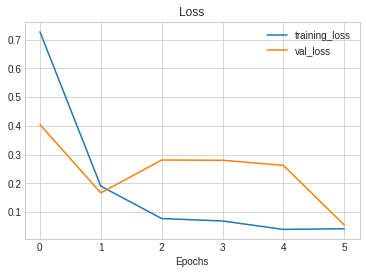

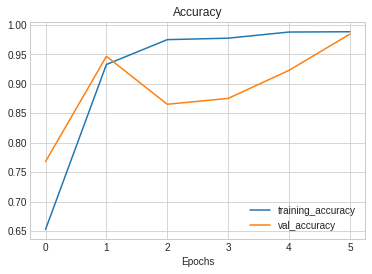

In [24]:
from plotting import plot_loss_curves
plot_loss_curves(history)